# 03. 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

In [1]:
# 분석 절차
# 1단계 : 변수 검토 및 전처리
# 성별 / 월급
# 2단계 : 변수 간 관계 분석
# 나이에 따른 월급 평균표 만들기 / 그래프 만들기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
welfare = pd.read_csv('./data/koweps_hpwc14_2019_beta2_step_02.csv')
welfare['birth'].head()

0    1945.0
1    1948.0
2    1942.0
3    1962.0
4    1963.0
Name: birth, dtype: float64

In [4]:
# 1. 나이 변수 검토 및 전처리하기
# 1) 변수 검토하기
# 나이 변수는 없고 태어난 연도 변수만 있음. 따라서 태어난 연도 변수를 기반으로 나이 변수를 만들어야 함.

welfare['birth'].dtypes

dtype('float64')

In [5]:
welfare['birth'].describe()  # 요약 통계량 구하기

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

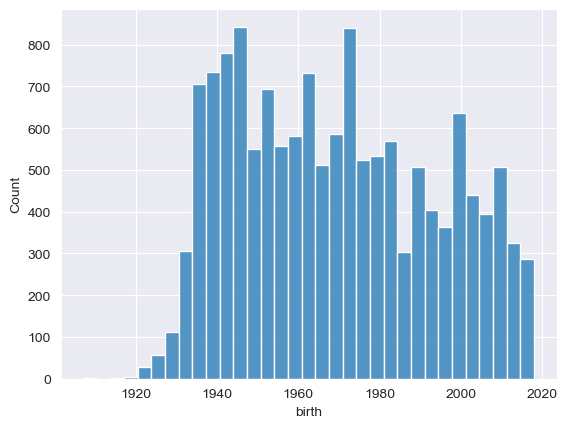

In [6]:
sns.histplot(data=welfare, x='birth')  # 히스토그램 만들기
plt.show()

In [7]:
# 2) 전처리
# 코드북을 보면 태어난 연도는 '모름/무응답'일 경우 9999로 코딩.
# 이 정보를 바탕으로 전처리.

welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [8]:
welfare['birth'].isna().sum()  # 결측치 확인

0

In [9]:
# 이상치와 결측치가 없으므로 파생변수를 만드는 단계로 넘어감.
# 만일 이상치가 발견되면 아래와 같이 전처리한 다음 분석을 진행.

# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

0

In [10]:
# 3) 파생변수 만들기 - 나이
# 2019년에 조사가 진행됐으니 2019에서 태어난 연도를 뺀 다음 1을 더해 나이를 구함

# 나이 변수 만들기
# df.assign(kwargs) : DataFrame에 새 열을 할당하는 메서드. kwargs : 새열이름 = 내용 형식으로 입력되는 키워드.
# 콤마(,)를 통해 여러개를 입력.
welfare = welfare.assign(age=2019 - welfare['birth'] + 1)

welfare['age'].describe()  # 요약 통계량 구하기

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

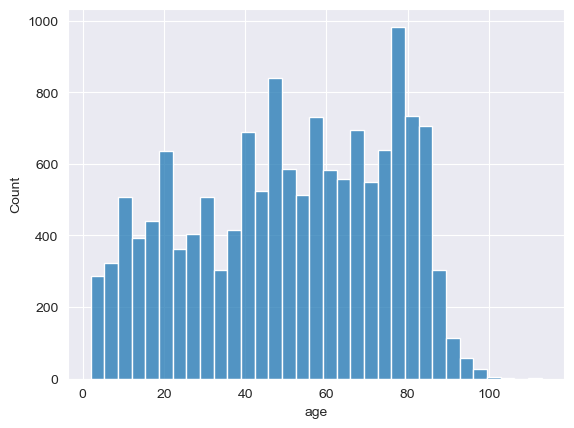

In [11]:
# 히스토그램 만들기
sns.histplot(data=welfare, x='age')
plt.show()

In [12]:
welfare.to_csv('./data/koweps_hpwc14_2019_beta2_step_03.csv', mode='w', index=False)